<h1 style="color: red; text-align:center">Bulletin of the Society for the Encouragement of National Industry</h1>
<hr>
<h3>❖ Authors:</h3>
<p>IZMOUH Maryam<br>TATI Mohammed</p>
<p style="text-align: right;"><b>11-JUN | <span style="color: green;">2023</span></b></p>

<h2 style="color: green">Importing libraries needed</h2>

In [1]:
# Data manipilation
import pandas as pd

# Scrapping tool
from bs4 import BeautifulSoup
from lxml import etree

# progress bar
from tqdm import tqdm

# To get the HTTP requests
import requests

# To make sure we are scrapping the right data
import re 

<h2 style="color: green">Data Scraping</h2>

In [2]:
def scraper():
    # DataFrame
    data = {"id": [], "year": [], "article": [], "theme": []}
    
    # Initialize the progress bar once
    total_iterations = 115
    progress_bar = tqdm(total=total_iterations, desc='Progress', unit='iteration')
    
    # Counter
    count = 0
    
    for i in range(1, 116):
        progress_bar.update(1)
        # HTML Page to scrap (1802-1910)
        html = requests.get(f"https://cnum.cnam.fr/pgi/redir.php?onglet=d&ident=BSPI.{i}").text
        
        # Parsing the HTML
        soup = BeautifulSoup(html, "html.parser")
        dom = etree.HTML(str(soup))
        
        # Getting the <span> tags that containes the data needed
        spans = soup.find_all('span', class_='row-label with-list2')
        
        for span in spans:
            # getting the list of articales
            for u in span.find_next_sibling('ul'):

                a_tags = u.find_all('a')

                for a in a_tags:
                    count += 1
                    # Record Id
                    record_id = "IT"+"{:06d}".format(count)
                    data["id"].append(record_id)
                    
                    # Year
                    year = dom.xpath('/html/body/div[1]/div/div[2]/ul/li[4]/text()')[0]
                    data['year'].append(year)
                    
                    # Article
                    data["article"].append(a.text)
                    
                    # Theme
                    data["theme"].append(span.text)
            
    return data

<h3>Generating the data</h3>

In [3]:
df = pd.DataFrame(scraper())

Progress: 100%|████████████████████████| 115/115 [04:14<00:00,  2.21s/iteration]


In [0]:
# Saving the data as CSV fo further precessing
df.to_csv('data.csv', index=False)

<h2 style="color: green">Data Cleaning Using Spark</h2>

In [0]:
%sql
select * from hive_metastore.default.output_data;

id,year,article,theme
IT000001,> 1802. An XI [1802]. 1e année,EXTRAIT des procès-verbaux des séances du Conseil (p.5),CONSEIL D'ADMINISTRATION (p.5)
IT000002,> 1802. An XI [1802]. 1e année,PROGRAMMES des prix proposés parla Société (p.6),CONSEIL D'ADMINISTRATION (p.5)
IT000003,> 1802. An XI [1802]. 1e année,"EXTRAIT d'un rapport fait à la Société d Encouragement, au nom du Comité des arts mécaniques, par le C. Molard, sur les machines a filer la soie (p.7)",ARTS MÉCANIQUES (p.7)
IT000004,> 1802. An XI [1802]. 1e année,PROCÉDÉ pour presser et former les chapeaux de paille (p.8),ARTS MÉCANIQUES (p.7)
IT000005,> 1802. An XI [1802]. 1e année,"RAPPORT fait , au nom du Comité des arts mécaniques , sur la proposition du C. relative a un nouveau genre de construction, navale (p.11)",ARTS MÉCANIQUES (p.7)
IT000006,> 1802. An XI [1802]. 1e année,"RAPPORT fait par le C. Conte, au nom du Comité des arts chimiques sur les peaux et taffetas vernis du C'. Meullersten (p.14)",ARTS CHIMIQUES (p.14)
IT000007,> 1802. An XI [1802]. 1e année,SUR l'éducation des bêtes à laine fine de race espagnole (p.15),AGRICULTURE (p.15)
IT000008,> 1802. An XI [1802]. 1e année,Rats des champs (p.17),AGRICULTURE (p.15)
IT000009,> 1802. An XI [1802]. 1e année,Arachide (p.18),AGRICULTURE (p.15)
IT000010,> 1802. An XI [1802]. 1e année,"TRAITÊ des constructions rurales, dans lequel on apprend la manière de construire, d'ordonner et de distribuer les habitations des champs, les chaumières, les logement pour les bestiaux, les granges, établis, écuries et autres batimens nécessaires aï exploitation des terres et h une basse-cour[...] (p.18)",AGRICULTURE (p.15)


In [0]:
data = _sqldf
data.show()

+--------+----+--------------------+--------------------+
|      id|year|             article|               theme|
+--------+----+--------------------+--------------------+
|IT000001|1802|extrait des procè...|conseil d'adminis...|
|IT000003|1802|extrait d'un rapp...|     arts mécaniques|
|IT000004|1802|procédé pour pres...|     arts mécaniques|
|IT000005|1802|rapport fait , au...|     arts mécaniques|
|IT000006|1802|rapport fait par ...|      arts chimiques|
|IT000007|1802|sur l'éducation d...|         agriculture|
|IT000008|1802|     rats des champs|         agriculture|
|IT000009|1802|            arachide|         agriculture|
|IT000010|1802|traitê des constr...|         agriculture|
|IT000012|1802|nouveau fourneau ...|    arts économiques|
|IT000013|1802|extrait du rappor...|    arts économiques|
|IT000014|1802|notice sur une fo...|    arts économiques|
|IT000015|1802|fourneaux économi...|    arts économiques|
|IT000016|1802|tableau des princ...|    arts économiques|
|IT000017|1802

In [0]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.ml.feature import CountVectorizer, StringIndexer
from pyspark.sql.functions import col
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, MultilayerPerceptronClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, Evaluator

def data_preparation(data):
    # Remove irrelevant columns
    data = data.drop("id", "year")

    # Handle missing values
    data = data.na.drop()

    # Remove duplicates
    data = data.dropDuplicates()

    # Tokenize text
    tokenizer = RegexTokenizer(inputCol="article", outputCol="tokens", pattern=r"\W")
    data = tokenizer.transform(data)

    # Remove stopwords
    custom_stopwords = StopWordsRemover.loadDefaultStopWords("french")
    stopwords_remover = StopWordsRemover(inputCol="tokens", outputCol="clean_tokens", stopWords=custom_stopwords)
    data = stopwords_remover.transform(data)

    # Create Word2Vec model
    word2Vec = Word2Vec(vectorSize=100, inputCol='clean_tokens', outputCol='embeddings')
    model = word2Vec.fit(data)
    data = model.transform(data)  
    
    # labels
    indexer = StringIndexer(inputCol='theme', outputCol='label')
    index = indexer.fit(data)
    data = index.transform(data)
    data = data.withColumn('label', col('label').cast('integer'))
    
    # Remove irrelevant columns
    data = data.drop("tokens", "article", "clean_tokens", "theme")

    return data


In [0]:
data = data_preparation(data)
data.show()

+--------------------+-----+
|          embeddings|label|
+--------------------+-----+
|[-0.1168406947205...|    4|
|[0.00993136857869...|    2|
|[-0.0022543733133...|    3|
|[-0.0588752850890...|    2|
|[0.02113899899025...|    5|
|[-0.1296595986110...|    0|
|[-0.0168820265680...|    2|
|[-0.0640184443592...|    4|
|[0.0,0.0,0.0,0.0,...|    2|
|[-0.0046440579462...|    0|
|[-0.0459612850099...|    2|
|[-0.0638084095687...|    0|
|[-0.0249059563429...|    3|
|[-0.0020905952454...|    2|
|[-0.0149175603874...|    2|
|[-0.0454251370392...|    0|
|[0.02296326081601...|   14|
|[-0.0333620670717...|    2|
|[-0.0535490322016...|   14|
|[-0.0190738588571...|    0|
+--------------------+-----+
only showing top 20 rows



In [0]:
# Step 1: Data Preparation
data = _sqldf
data = data_preparation(data)

# Step 2: Split the Data
train_data, test_data = data.randomSplit([0.7, 0.3])

# Step 3: Select a Classification Algorithm
lr = LogisticRegression(featuresCol='embeddings', labelCol='label')

# Step 4: Train the Model
model = lr.fit(train_data)

# Step 5: Evaluate the Model
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8699941736259468


<h2>Analysis Task</h2>

In [0]:
data = _sqldf
data.show()

+--------+----+--------------------+--------------------+
|      id|year|             article|               theme|
+--------+----+--------------------+--------------------+
|IT000001|1802|extrait des procè...|conseil d'adminis...|
|IT000003|1802|extrait d'un rapp...|     arts mécaniques|
|IT000004|1802|procédé pour pres...|     arts mécaniques|
|IT000005|1802|rapport fait , au...|     arts mécaniques|
|IT000006|1802|rapport fait par ...|      arts chimiques|
|IT000007|1802|sur l'éducation d...|         agriculture|
|IT000008|1802|     rats des champs|         agriculture|
|IT000009|1802|            arachide|         agriculture|
|IT000010|1802|traitê des constr...|         agriculture|
|IT000012|1802|nouveau fourneau ...|    arts économiques|
|IT000013|1802|extrait du rappor...|    arts économiques|
|IT000014|1802|notice sur une fo...|    arts économiques|
|IT000015|1802|fourneaux économi...|    arts économiques|
|IT000016|1802|tableau des princ...|    arts économiques|
|IT000017|1802

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import desc, rank
from pyspark.sql.window import Window

# Step 1: Group by year and theme, and count the occurrences
grouped_data = data.groupBy('year', 'theme').count()

# Step 2: Rank the themes within each year based on the count
window_spec = Window.partitionBy('year').orderBy(desc('count'))
ranked_data = grouped_data.withColumn('rank', rank().over(window_spec))

# Step 3: Filter the top three themes for each year
filtered_data = ranked_data.filter(ranked_data.rank <= 3)

# Step 4: Convert the filtered data into a DataFrame
df = filtered_data.toPandas()


In [0]:
df.head()

,year,theme,count,rank
0,1802,arts chimiques,33,1
1,1802,arts mécaniques,28,2
2,1802,arts économiques,20,3
3,1803,arts chimiques,45,1
4,1803,arts mécaniques,18,2


In [0]:
df_1802 = df[df['year'] == '1802']
df_1825 = df[df['year'] == '1825']
df_1850 = df[df['year'] == '1850']
df_1875 = df[df['year'] == '1875']
df_1910 = df[df['year'] == '1910']

In [0]:
statics_df = pd.concat([df_1802, df_1825, df_1850, df_1875, df_1910])
statics_df

,year,theme,count,rank
0,1802,arts chimiques,33,1
1,1802,arts mécaniques,28,2
2,1802,arts économiques,20,3
70,1825,arts mécaniques,89,1
71,1825,arts chimiques,34,2
72,1825,industriel,31,3
146,1850,industriel,222,1
147,1850,arts mécaniques,93,2
148,1850,arts économiques,41,3
221,1875,industriel,72,1


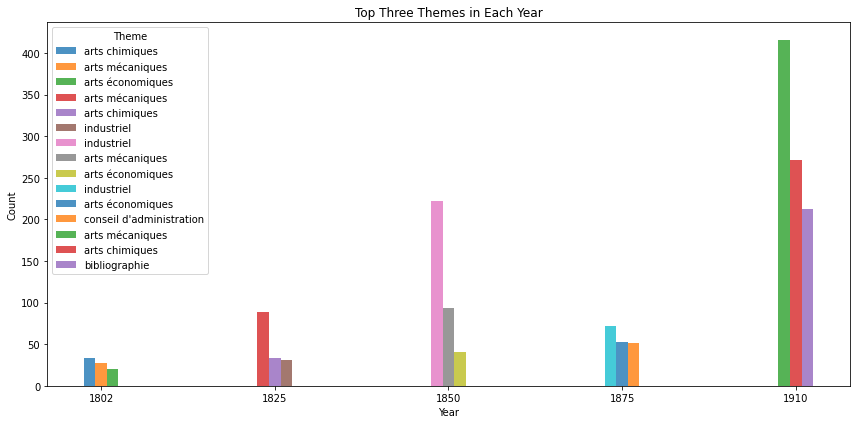

In [0]:
# Step 5: Plot the data as a grouped bar chart
plt.figure(figsize=(12, 6))

# Grouped bar chart parameters
bar_width = 0.2
opacity = 0.8

# Get unique years in the dataset
years = sorted(statics_df['year'].unique())

# Iterate over each year and plot the top three themes as grouped bars
for i, year in enumerate(years):
    df_year = statics_df[statics_df['year'] == year].head(3)  # Select top three themes for each year
    x = i * 3  # Calculate the x position for each year
    
    # Plot each theme as a grouped bar
    for j, theme in enumerate(df_year['theme']):
        y = df_year[df_year['theme'] == theme]['count'].values[0]  # Get the count value
        plt.bar(x + j * bar_width, y, bar_width, alpha=opacity, label=theme)

# Set the x-axis labels and tick positions
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Three Themes in Each Year')
plt.xticks([i * 3 + bar_width for i in range(len(years))], years)
plt.legend(title='Theme')
plt.tight_layout()

# Show the modified plot
plt.show()
